In [39]:
# Time magics
import time
# With the goal above, I will import just what I need.
# The model to use is Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
# The error metrics will be c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

# An efficient data structure.
import pandas as pd

# Import the data
titanic = pd.read_csv("Datasets/titanic.csv")
y = titanic['Survived']
X = titanic.drop('Survived', axis=1)

In [40]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
print("Number of NA's in 'Age': {}".format(sum(X.Age.isna())))
print("Number of NA's in 'Cabin': {}".format(sum(X.Cabin.isna())))      

print("\nComplete preview: \n{}".format(X.isna()))


Number of NA's in 'Age': 177
Number of NA's in 'Cabin': 687

Complete preview: 
     PassengerId  Pclass   Name    Sex    Age  SibSp  Parch  Ticket   Fare  \
0          False   False  False  False  False  False  False   False  False   
1          False   False  False  False  False  False  False   False  False   
2          False   False  False  False  False  False  False   False  False   
3          False   False  False  False  False  False  False   False  False   
4          False   False  False  False  False  False  False   False  False   
..           ...     ...    ...    ...    ...    ...    ...     ...    ...   
886        False   False  False  False  False  False  False   False  False   
887        False   False  False  False  False  False  False   False  False   
888        False   False  False  False   True  False  False   False  False   
889        False   False  False  False  False  False  False   False  False   
890        False   False  False  False  False  False  False   

In [44]:
# We have at least two variables with NA values, let's focus on Age now because it's easy to impute.
# We will use the mean of 'Age' to impute with mean
X["Age"].fillna(X.Age.mean(), inplace = True)

# Confirm the code is correct
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
# Get just the numeric variables by selecting only the variables that are not "object" datatypes.
X.dtypes
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [46]:
# PassengerId seems like a wortless variable, however, it could be valuable. 
# Therefore, we keep them, lets say a customer bought the ticket early and paid less, etc...

In [48]:
# Let's build our first model. We set the oob_score = True. It is a good idea to increase n_estimators to a number higher than the default.
# In this case the oob_predictions will be based on a forest of 33 trees.

model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

# I only use numeric_variables because I have yet to dummy out the categorical variables
model.fit(X[numeric_variables], y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [49]:
# For regression, the oob_score_attribute gives the R^2 based on the oob predictions. We want to use c-stat.
# By the way, attributes in sklearn that have a trailing underscore are only available after the model has been trained (fit method ran).
# oob = Out of Bag
print("Trailing underscore: {: .2f}".format(model.oob_score_))

Trailing underscore:  0.14


In [50]:
y_oob = model.oob_prediction_
print("c-stat: {: .2f}".format(roc_auc_score(y, y_oob))) 

c-stat:  0.74


In [51]:
# Out-of-bag predicitons is basically an array of predictions of survival rate for each observation.
y_oob

array([0.71111111, 0.72413793, 0.02325581, 0.47368421, 0.16666667,
       0.34146341, 0.64705882, 0.17647059, 0.52777778, 0.75609756,
       0.72222222, 0.29411765, 0.38709677, 0.625     , 0.87096774,
       0.46875   , 0.04444444, 0.78571429, 0.41304348, 0.24242424,
       0.88571429, 0.64102564, 0.35897436, 0.5       , 0.27777778,
       0.05128205, 0.88636364, 0.71428571, 0.46875   , 0.36842105,
       0.47368421, 0.23684211, 0.84090909, 0.67647059, 0.82051282,
       0.475     , 0.33333333, 0.225     , 0.18421053, 0.53191489,
       0.275     , 0.57777778, 0.11904762, 0.90625   , 0.36363636,
       0.0625    , 0.61764706, 0.62162162, 0.44186047, 0.16129032,
       0.25      , 0.70833333, 0.25      , 0.61290323, 0.36363636,
       0.4       , 0.66666667, 0.5       , 1.        , 0.13157895,
       0.33333333, 0.2       , 0.76923077, 0.21428571, 0.5       ,
       0.25      , 0.36842105, 0.33333333, 0.4516129 , 0.10526316,
       0.88888889, 0.13157895, 0.51351351, 0.23076923, 0.34146

In [52]:
# Here is a simple function to show descriptive stats on the categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [53]:
describe_categorical(X)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


In [54]:
# Drop the variables I don't feel like dealing with for this tutorial
X.drop(["Name", "Ticket", "PassengerId"],axis=1,inplace=True)

In [55]:
X.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [56]:
# Change the Cabin variable to be only the first letter or None

X["Cabin"] = (X["Cabin"].dropna().str[0])
X["Cabin"] = X["Cabin"].fillna("None")
# Return only the first letter of each observation, if NaN remove.

In [57]:
categorical_variables = ['Sex', 'Cabin', 'Embarked']

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Create an array of dummies
    dummies = pd.get_dummies(X[variable], prefix = variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [58]:
# Look at the columns in the dataset
def printall(X, max_rows = 10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))

printall(X)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
1,1,38.000000,1,0,71.2833,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
2,3,26.000000,0,0,7.9250,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,1,35.000000,1,0,53.1000,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
4,3,35.000000,0,0,8.0500,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
887,1,19.000000,0,0,30.0000,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
888,3,29.699118,1,2,23.4500,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
889,1,26.000000,0,0,30.0000,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False


In [59]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=-1,random_state=42)
model.fit(X, y)
print("c-stat: {: .2f}".format(roc_auc_score(y, model.oob_prediction_)))

# This is pretty good

c-stat:  0.86


In [98]:
# Variable importance measures

In [60]:
model.feature_importances_

array([9.11384671e-02, 2.38891052e-01, 4.43567267e-02, 2.15831071e-02,
       2.15047796e-01, 1.43423437e-01, 1.58822440e-01, 2.95342368e-03,
       3.79055011e-03, 6.47116172e-03, 4.30998991e-03, 8.59480266e-03,
       1.02403226e-03, 8.12054428e-04, 2.67741854e-02, 6.64265010e-05,
       1.06189189e-02, 0.00000000e+00, 6.00379221e-03, 1.53176370e-02])

<Axes: >

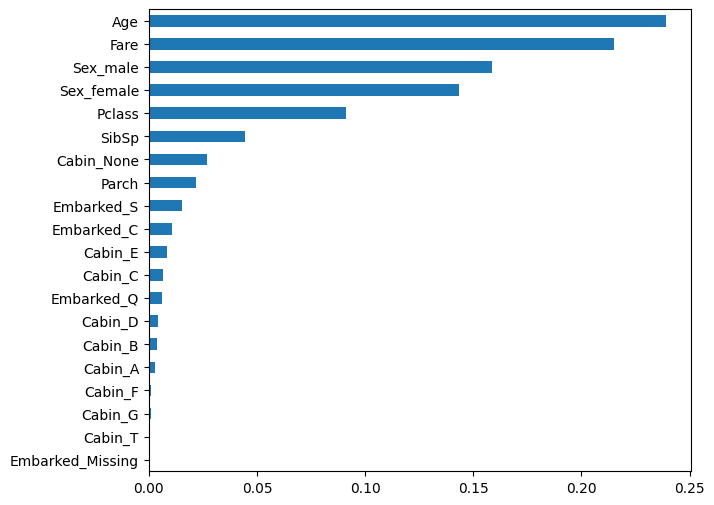

In [22]:
# Simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index = X.columns)
feature_importances = feature_importances.sort_values(ascending=True)
feature_importances.plot(kind="barh", figsize = (7, 6))

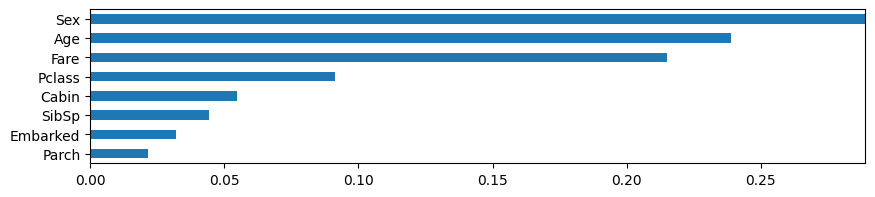

In [61]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    if autoscale:
        x_scale = model.feature_importances_.max() + headroom
    else:
        x_scale = 1
    
    feature_dict = dict(zip(feature_names, model.feature_importances_))

    if summarized_columns:
        
        for col_name in summarized_columns:
            
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i)

            
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i]
            for i in keys_to_remove:
                feature_dict.pop(i)

            
            feature_dict[col_name] = sum_value
    
    
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())

    
    results = results.sort_values()

    results.plot(kind="barh", figsize=(width, len(results)/4), xlim=(0, x_scale))

graph_feature_importances(model, X.columns, summarized_columns=categorical_variables)

In [62]:
# Parameter tests
print(X.dtypes)
print(y.dtypes)

Pclass                int64
Age                 float64
SibSp                 int64
Parch                 int64
Fare                float64
Sex_female             bool
Sex_male               bool
Cabin_A                bool
Cabin_B                bool
Cabin_C                bool
Cabin_D                bool
Cabin_E                bool
Cabin_F                bool
Cabin_G                bool
Cabin_None             bool
Cabin_T                bool
Embarked_C             bool
Embarked_Missing       bool
Embarked_Q             bool
Embarked_S             bool
dtype: object
int64


In [63]:
# TBC

# n_jobs comparison [1, -1]

for jobs in [1, -1]:
    start = time.perf_counter()

    model = RandomForestRegressor(1000, oob_score=True, n_jobs=jobs, random_state=42)

    model.fit(X, y)

    elapsed = time.perf_counter() - start
    print(f"n_jobs = {jobs}: {elapsed:.2f} seconds")

# TBC

n_jobs = 1: 2.41 seconds
n_jobs = -1: 1.61 seconds


In [ ]:
# n_estimators


30 trees
C-stat: 0.8539

50 trees
C-stat: 0.8607

100 trees
C-stat: 0.8635

200 trees
C-stat: 0.8622

500 trees
C-stat: 0.8637

1000 trees
C-stat: 0.8641

2000 trees
C-stat: 0.8634



<Axes: >

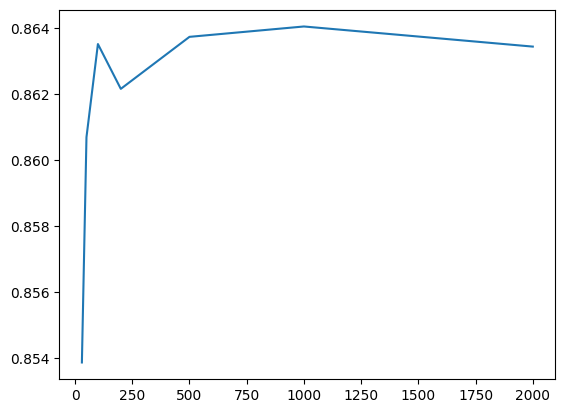

In [64]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print(trees, "trees")
    roc = roc_auc_score(y, model.oob_prediction_)
    print("C-stat: {:.4f}".format(roc))
    results.append(roc)
    print("")

pd.Series(results, n_estimator_options).plot()

sqrt option
C-stat:  0.8634

log2 option
C-stat:  0.8634

0.9 option
C-stat:  0.8635

0.2 option
C-stat:  0.8634



<Axes: >

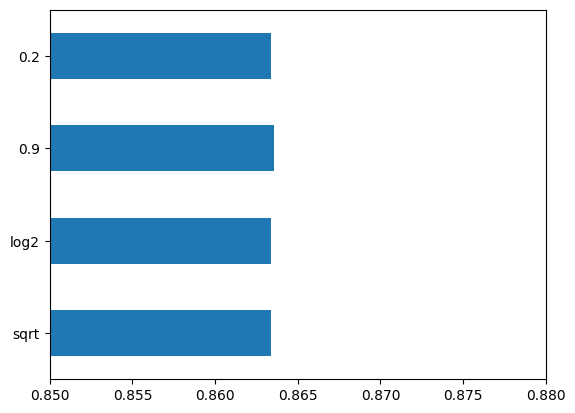

In [ ]:
results = []
max_features_options = ["sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(
        n_estimators=1000,
        oob_score=True,
        n_jobs=-1,
        random_state=42,
        max_features=max_features
    )

    model.fit(X, y)

    print(max_features, "option")

    
    roc = roc_auc_score(y, model.oob_prediction_)
    print("C-stat: {: .4f}".format(roc))

    results.append(roc)
    print("")

pd.Series(results, index=max_features_options).plot(kind="barh", xlim=(.85, .88))

1 min samples
C-stat:  0.8641

2 min samples
C-stat:  0.8696

3 min samples
C-stat:  0.8716

4 min samples
C-stat:  0.8735

5 min samples
C-stat:  0.8743

6 min samples
C-stat:  0.8740

7 min samples
C-stat:  0.8733

8 min samples
C-stat:  0.8719

9 min samples
C-stat:  0.8693

10 min samples
C-stat:  0.8674



<Axes: >

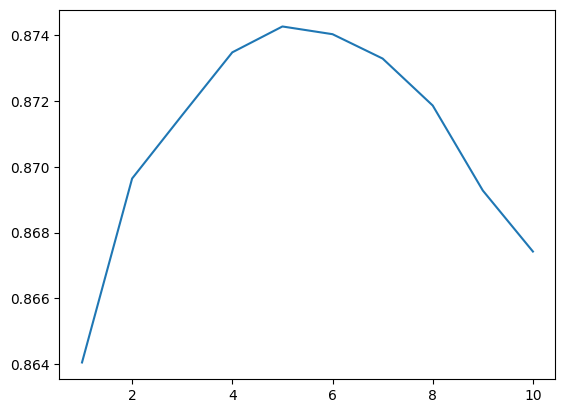

In [71]:
# min_samples_leaf
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True,n_jobs=-1,random_state=42,max_features=None,min_samples_leaf=min_samples)

    model.fit(X, y)
    print(min_samples, "min samples")
    roc = roc_auc_score(y, model.oob_prediction_)
    print("C-stat: {: .4f}".format(roc))
    results.append(roc)
    print("")

pd.Series(results, min_samples_leaf_options).plot()

In [73]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1,
                              random_state=42,
                              max_features=None,
                              min_samples_leaf=5)

model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print("C-stat: {: .4f}".format(roc))

# We get a final C-stat of .87
# Once we optimize our model, we move onto feature engineering.

C-stat:  0.8743
